In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.stats as sts

plt.style.use('ggplot')

In [52]:
S = 1000
X = 1030
V = 20
T = 1
budget = 1000

prices = [900, 950, 1000, 1050, 1100]

## Task 1

### Стратегия Васи

$Budget - Option Price - Strike + Sell Return$

In [53]:
return_V = []
for price in prices:
    return_V.append(budget - V - X + price)

In [54]:
np.array(return_V) - budget

array([-150, -100,  -50,    0,   50])

In [69]:
(np.array(return_V) - budget)/budget

array([-0.15, -0.1 , -0.05,  0.  ,  0.05])

### Стратегия Пети

$Budget - Spot Price + SellPrice$

In [59]:
return_P = []
for price in prices:
    return_P.append(budget - S + price)

In [60]:
np.array(return_P) - budget

array([-100,  -50,    0,   50,  100])

In [70]:
(np.array(return_P) - budget)/budget

array([-0.1 , -0.05,  0.  ,  0.05,  0.1 ])

### Стратегия Коли

$Budget - k*OptionPrice - k*Strike + k*SellPrice$

In [72]:
return_K = []
num_options = budget//V

for price in prices:
    return_K.append(budget - num_options * V  - num_options * X + num_options * price)

In [73]:
np.array(return_K) - budget

array([-7500, -5000, -2500,     0,  2500])

In [74]:
(np.array(return_K) - budget)/budget

array([-7.5, -5. , -2.5,  0. ,  2.5])

## Task 2

In [11]:
X = 300
V_put = 8
S = 298
tau = 2
r = 0.02

$C-P = B (F - X)$

In [12]:
V_call = S - X * np.exp(-r * tau) + V_put
round(V_call)

18

## Task 3

In [13]:
def BS_Option_Price(type_option, s0, K, sigma, tau, r):
    K = np.array(K)

    d1 = (np.log(s0 / K) + (r + 0.5 * sigma**2 * tau)) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    if type_option == 'c' or type_option == 1:
        value = sts.norm.cdf(d1) * s0 - sts.norm.cdf(d2) * K * np.exp(-r * tau)
    elif type_option == 'p' or type_option == -1:
        value = sts.norm.cdf(-d2) * K * np.exp(-r * tau) - sts.norm.cdf(-d1)*s0

    return value

In [14]:
s0 = 500
K = 505
sigma = 0.05
tau = 1
r = 0.04

BS_Option_Price('c', s0, K, sigma, tau, r)

18.9478645704541

In [82]:
s = np.arange(300, 700, 20)

In [83]:
Vc_prices = []
Vp_prices = []
payoff_func_c = []
payoff_func_p = []

for s0 in s:
    Vc_prices.append(BS_Option_Price('c', s0, K, sigma, tau, r))
    Vp_prices.append(BS_Option_Price('p', s0, K, sigma, tau, r))
    payoff_func_c.append(max(s0 - K, 0))
    payoff_func_p.append(max(K - s0, 0))


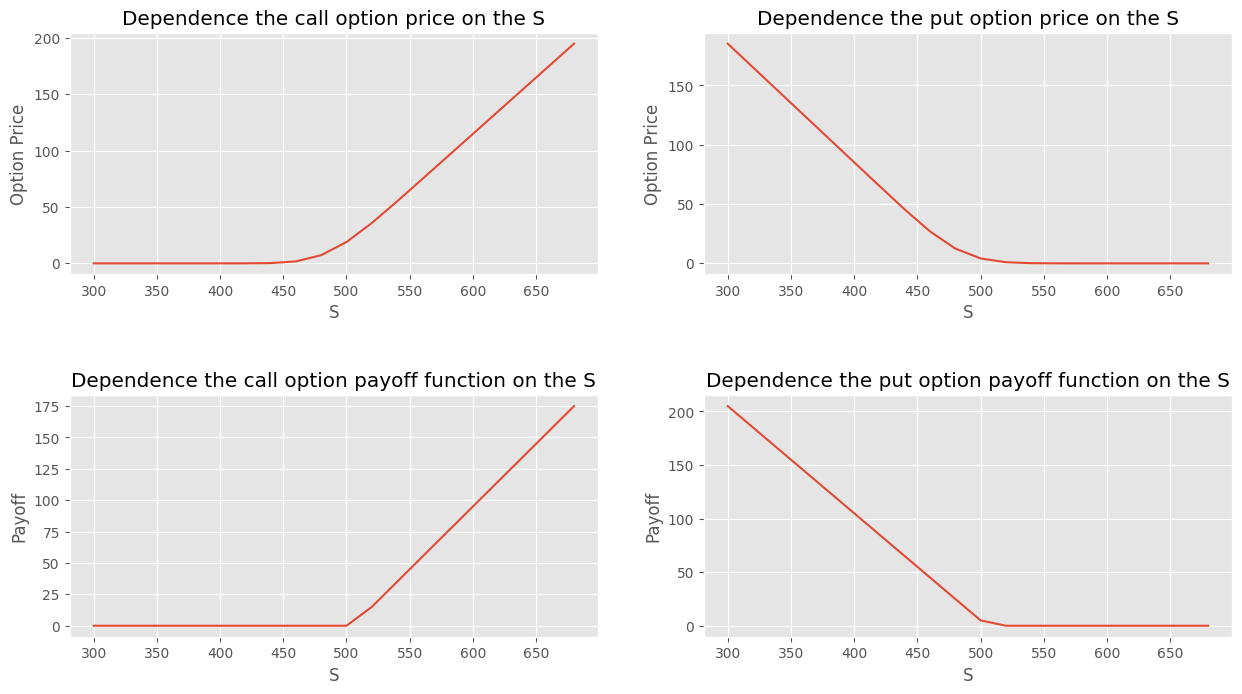

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8), dpi=100)

axs[0, 0].plot(s, Vc_prices)
axs[0, 0].set_xlabel('S')
axs[0, 0].set_ylabel('Option Price')
axs[0, 0].set_title('Dependence the call option price on the S')

axs[0, 1].plot(s, Vp_prices)
axs[0, 1].set_xlabel('S')
axs[0, 1].set_ylabel('Option Price')
axs[0, 1].set_title('Dependence the put option price on the S')

axs[1, 0].plot(s, payoff_func_c)
axs[1, 0].set_xlabel('S')
axs[1, 0].set_ylabel('Payoff')
axs[1, 0].set_title('Dependence the call option payoff function on the S')

axs[1, 1].plot(s, payoff_func_p)
axs[1, 1].set_xlabel('S')
axs[1, 1].set_ylabel('Payoff')
axs[1, 1].set_title('Dependence the put option payoff function on the S')

plt.subplots_adjust(hspace=0.5)
plt.show()

### Greeks

In [30]:
def delta_option(type_option, s0, K, sigma, tau, r):
    d1 = (np.log(s0 / K) + (r + 0.5 * sigma**2 * tau)) / (sigma * np.sqrt(tau))

    if type_option == 'c':
        delta = sts.norm.cdf(d1)
    else:
        delta = sts.norm.cdf(d1) - 1

    return delta

def gamma_option(type_option, s0, K, sigma, tau, r):
    d1 = (np.log(s0 / K) + (r + 0.5 * sigma**2 * tau)) / (sigma * np.sqrt(tau))

    if type_option == 'c':
        gamma = sts.norm.pdf(d1)/(s0*sigma*np.sqrt(tau))
    else:
        gamma = sts.norm.pdf(d1)/(s0*sigma*np.sqrt(tau))

    return gamma


def theta_option(type_option, s0, K, sigma, tau, r):
    d1 = (np.log(s0 / K) + (r + 0.5 * sigma**2 * tau)) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    if type_option == 'c':
        theta = - s0 * sts.norm.pdf(d1) * sigma / (2*np.sqrt(tau)) - r*K*np.exp(-r*tau)*sts.norm.cdf(d2)
    else:
        theta = - s0 * sts.norm.pdf(d1) * sigma / (2*np.sqrt(tau)) + r*K*np.exp(-r*tau)*sts.norm.cdf(-d2)

    return theta

def vega_option(type_option, s0, K, sigma, tau, r):
    d1 = (np.log(s0 / K) + (r + 0.5 * sigma**2 * tau)) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    if type_option == 'c':
        vega = s0 * np.sqrt(tau) * sts.norm.pdf(d1)
    else:
        vega = s0 * np.sqrt(tau) * sts.norm.pdf(d1)

    return vega

def rho_option(type_option, s0, K, sigma, tau, r):
    d1 = (np.log(s0 / K) + (r + 0.5 * sigma**2 * tau)) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    if type_option == 'c':
        rho = K * tau * np.exp(-r * tau) * sts.norm.cdf(d2)
    else:
        rho = - K * tau * np.exp(-r * tau) * sts.norm.cdf(-d2)

    return rho

def speed_option(type_option, s0, K, sigma, tau, r):
    d1 = (np.log(s0 / K) + (r + 0.5 * sigma**2 * tau)) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)

    if type_option == 'c':
        speed = -np.exp(-r * tau) * sts.norm.pdf(d1) * (d1 + sigma * np.sqrt(tau)) / (s0**2 * sigma**2 * tau)
    else:
        speed = -np.exp(-r * tau) * sts.norm.pdf(-d1) * (d1 + sigma * np.sqrt(tau)) / (s0**2 * sigma**2 * tau)

    return speed

In [47]:
s = np.arange(300, 700, 20)

delta = []
gamma = []
theta = []
vega = []
rho = []
speed = []

delta_put = []
gamma_put = []
theta_put = []
vega_put = []
rho_put = []
speed_put = []

for s0 in s:
    delta.append(delta_option('c', s0, K, sigma, tau, r))
    gamma.append(gamma_option('c', s0, K, sigma, tau, r))
    theta.append(theta_option('c', s0, K, sigma, tau, r))
    vega.append(vega_option('c', s0, K, sigma, tau, r))
    rho.append(rho_option('c', s0, K, sigma, tau, r))
    speed.append(speed_option('c', s0, K, sigma, tau, r))

    delta_put.append(delta_option('p', s0, K, sigma, tau, r))
    gamma_put.append(gamma_option('p', s0, K, sigma, tau, r))
    theta_put.append(theta_option('p', s0, K, sigma, tau, r))
    vega_put.append(vega_option('p', s0, K, sigma, tau, r))
    rho_put.append(rho_option('p', s0, K, sigma, tau, r))
    speed_put.append(speed_option('p', s0, K, sigma, tau, r))

greeks_call = np.array([delta, gamma, theta, vega, rho, speed])
greeks_put = np.array([delta_put, gamma_put, theta_put, vega_put, rho_put, speed_put])

greeks_array = np.array([greeks_call, greeks_put])

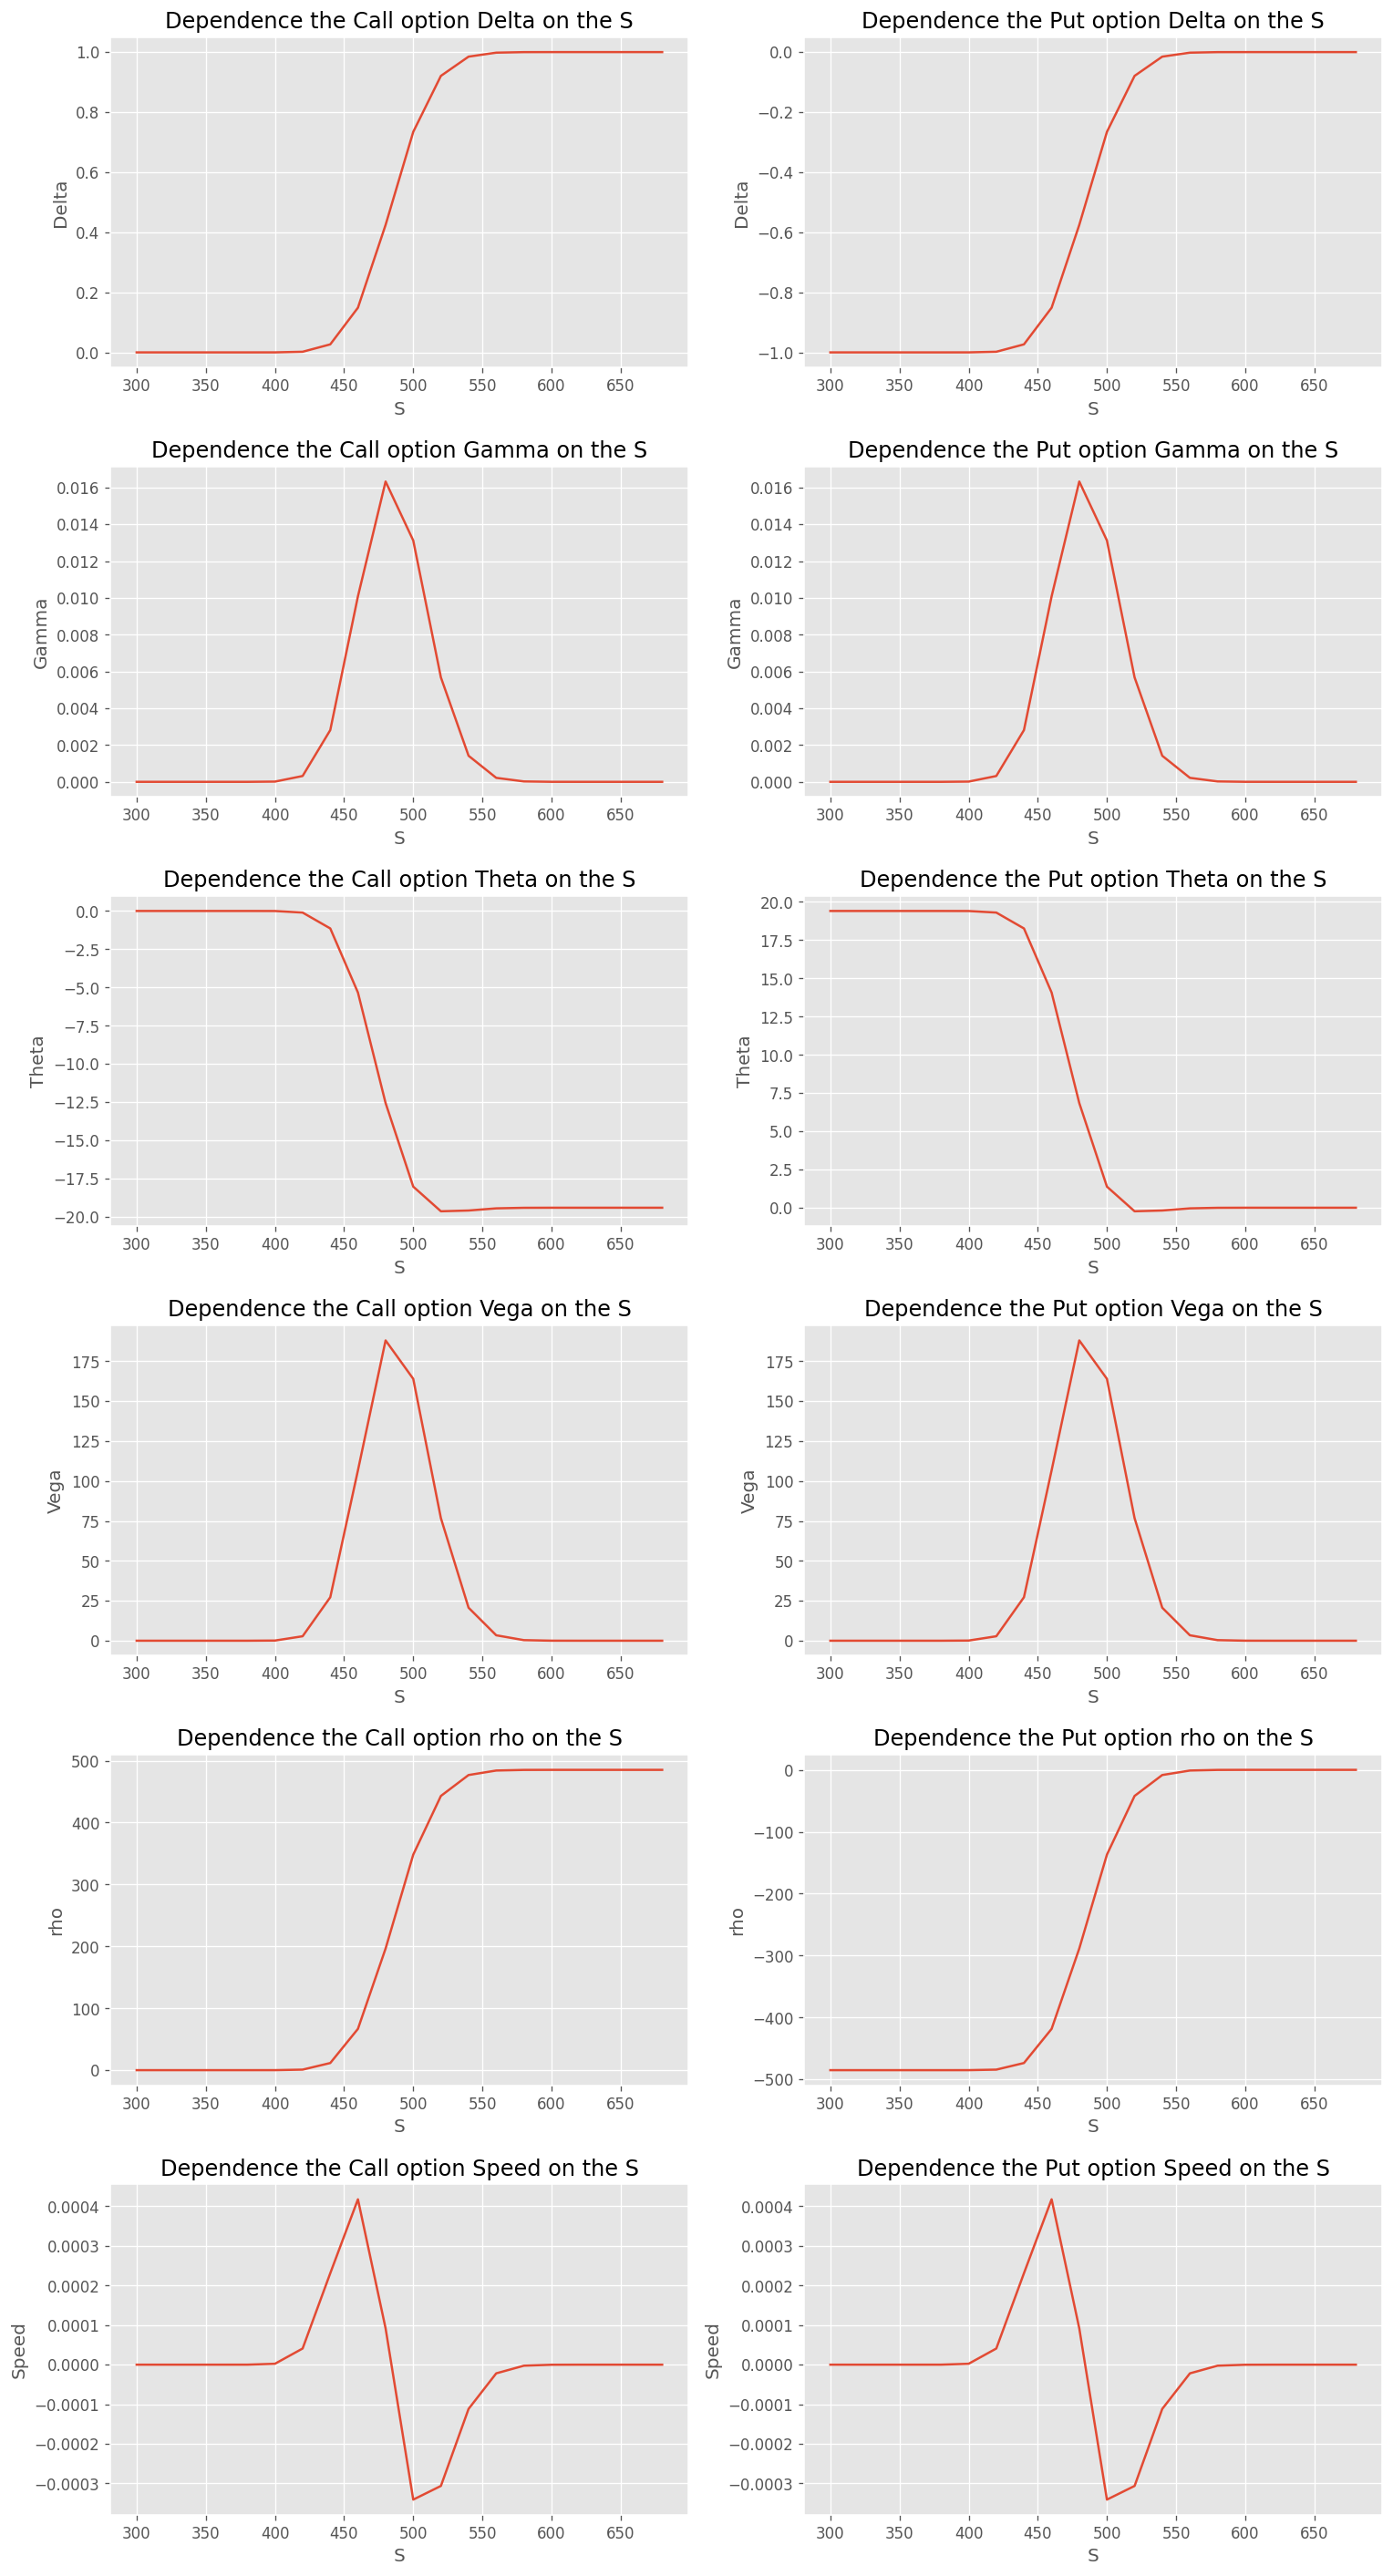

In [48]:
fig, axs = plt.subplots(6, 2, figsize=(15, 30), dpi=120)

greeks = ['Delta', 'Gamma', 'Theta', 'Vega', 'rho', 'Speed']
call_put = ['Call', 'Put']

for i in range(6):
    for j in range(2):
        axs[i, j].plot(s, greeks_array[j][i])

        axs[i, j].set_xlabel('S')
        axs[i, j].set_ylabel(greeks[i])
        axs[i, j].set_title(f'Dependence the {call_put[j]} option {greeks[i]} on the S')


plt.subplots_adjust(hspace=0.3)
plt.show()

### Put-Call Parity

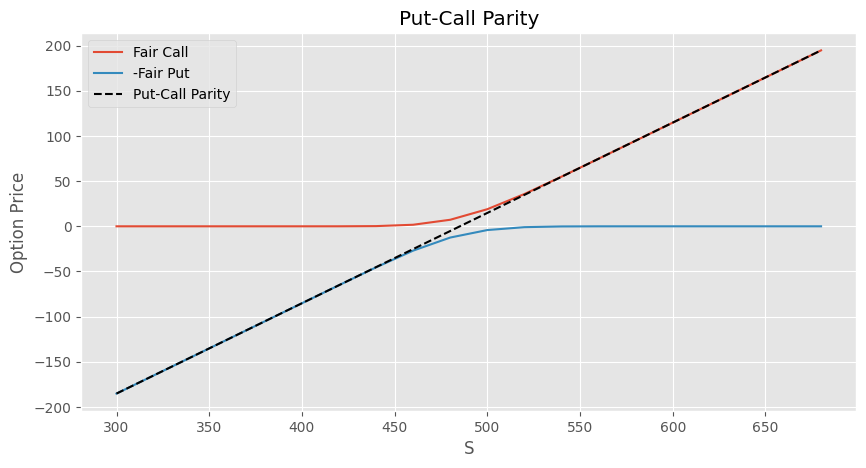

In [130]:
plt.subplots(figsize=(10, 5), dpi=100)

plt.plot(s, Vc_prices, label='Fair Call')
plt.plot(s, -np.array(Vp_prices), label='-Fair Put')
plt.plot(s, s - K * np.exp(-r * tau), '--', label='Put-Call Parity', c='black')
# plt.plot(s, s - K * np.exp(-0.05 * tau), '--', label='Put-Call Parity', c='black')

plt.title('Put-Call Parity')
plt.xlabel('S')
plt.ylabel('Option Price')
plt.legend()
plt.show()

In [131]:
Vc_sigma = []
Vp_sigma = []
Vc_tau = []
Vp_tau = []
Vc_r = []
Vp_r = []

sigma_array = np.linspace(1e-4, 0.5, 10)
r_array = np.linspace(1e-4, 0.1, 10)
tau_array = np.linspace(1e-5, 1, 5)

for i in sigma_array:
    Vc_sigma.append(BS_Option_Price('c', s, K, i, tau, r))
    Vp_sigma.append(BS_Option_Price('p', s, K, i, tau, r))

for i in r_array:
    Vc_r.append(BS_Option_Price('c', s, K, sigma, tau, i))
    Vp_r.append(BS_Option_Price('p', s, K, sigma, tau, i))

for i in tau_array:
    Vc_tau.append(BS_Option_Price('c', s, K, sigma, i, r))
    Vp_tau.append(BS_Option_Price('p', s, K, sigma, i, r))

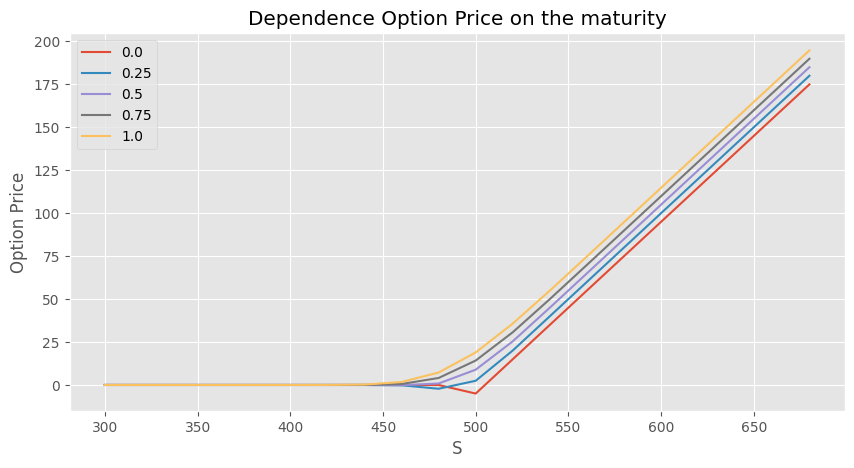

In [141]:
plt.subplots(figsize=(10, 5), dpi=100)

for i in range(len(Vc_tau)):
    plt.plot(s, Vc_tau[i], label=round(tau_array[i], 3))

plt.title('Dependence Option Price on the maturity')
plt.xlabel('S')
plt.ylabel('Option Price')
plt.legend()
plt.show()

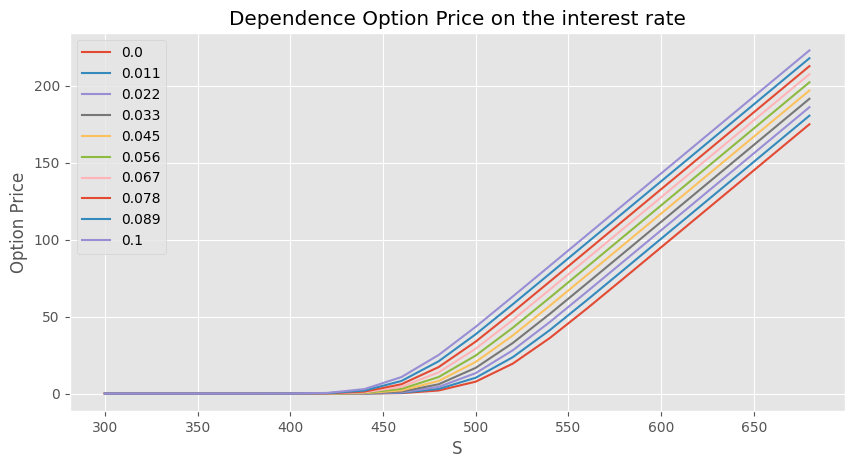

In [138]:
plt.subplots(figsize=(10, 5), dpi=100)

for i in range(len(Vc_r)):
    plt.plot(s, Vc_r[i], label=round(r_array[i], 3))

plt.title('Dependence Option Price on the interest rate')
plt.xlabel('S')
plt.ylabel('Option Price')
plt.legend()
plt.show()

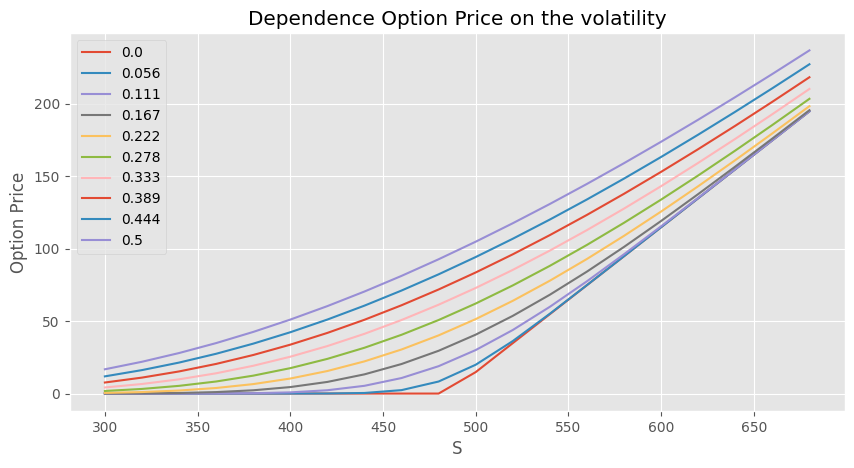

In [140]:
plt.subplots(figsize=(10, 5), dpi=100)

for i in range(len(Vc_sigma)):
    plt.plot(s, Vc_sigma[i], label=round(sigma_array[i], 3))

plt.title('Dependence Option Price on the volatility')
plt.xlabel('S')
plt.ylabel('Option Price')
plt.legend()
plt.show()